### Seeds for reproducibility

In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

### Importing the libraries

In [74]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

### Loading the images data

In [5]:
kaggle_credential = json.load(open('kaggle.json'))

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:01<54:37, 668kB/s]
  0%|          | 2.00M/2.04G [00:01<27:21, 1.33MB/s]
  0%|          | 3.00M/2.04G [00:01<17:10, 2.12MB/s]
  0%|          | 5.00M/2.04G [00:02<09:10, 3.97MB/s]
  0%|          | 7.00M/2.04G [00:02<05:52, 6.20MB/s]
  0%|          | 9.00M/2.04G [00:02<04:30, 8.06MB/s]
  1%|          | 11.0M/2.04G [00:02<03:34, 10.1MB/s]
  1%|          | 13.0M/2.04G [00:02<03:11, 11.4MB/s]
  1%|          | 15.0M/2.04G [00:02<02:49, 12.8MB/s]
  1%|          | 17.0M/2.04G [00:02<02:35, 14.0MB/s]
  1%|          | 19.0M/2.04G [00:02<02:24, 15.1MB/s]
  1%|1         | 21.0M/2.04G [00:03<02:21, 15.3MB/s]
  1%|1         | 23.0M/2.04G [00:03<02:16, 15.9MB/s]
  1%|1         | 25.0M/2.04G [00:03<02:13, 16.2MB/s]
  1%|1         | 27.0M/2.04G [00:03<02:15, 16.0MB/s]
  1%|1         | 29.0M/2.04G [00:03<02:09, 16.7MB/s]
  1%|1         | 31.0M/2.04G [00:03<02:13, 16.1MB/s]
  2%|1         | 33.0M/2.04G [00:03<02:07, 17.0MB/s]
  

In [8]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 8C90-BF24

 Directory of D:\Projects\Deep Learning\Plant Disease Prediction Using CNN

22-08-2024  09:42    <DIR>          .
22-08-2024  09:13    <DIR>          ..
22-08-2024  09:18    <DIR>          .ipynb_checkpoints
22-08-2024  09:14    <DIR>          Data
22-08-2024  09:17                68 kaggle.json
22-08-2024  09:42            69,887 Plant Disease Prediction using CNN.ipynb
28-10-2019  12:25     2,189,386,419 plantvillage-dataset.zip
               3 File(s)  2,189,456,374 bytes
               4 Dir(s)  298,426,834,944 bytes free


### Unzipping the dataset

In [9]:
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [12]:
os.listdir('plantvillage dataset')

['color', 'grayscale', 'segmented']

In [20]:
print(f'No. of folders in Color directory: {len(os.listdir('plantvillage dataset/color'))}')
print(f'No. of folders in Greyscale directory: {len(os.listdir('plantvillage dataset/grayscale'))}')
print(f'No. of folders in Segmented directory: {len(os.listdir('plantvillage dataset/segmented'))}')

No. of folders in Color directory: 38
No. of folders in Greyscale directory: 38
No. of folders in Segmented directory: 38


### Data Prepocessing

In [29]:
image_path = 'plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the Image
img = plt.imread(image_path)
print(img.shape)
print(img)

(256, 256, 3)
[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


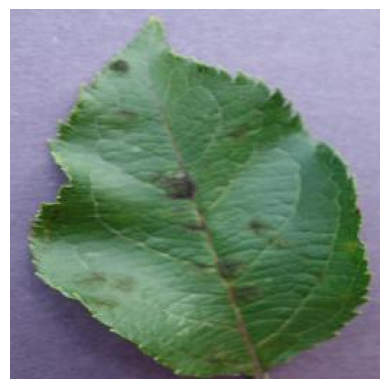

In [25]:
plt.imshow(img)
plt.axis('off') # Turning the axis off
plt.show() # Remove the extra text from top

In [26]:
# Setting Image Parameters
img_size = 224
batch_size = 32

### Train Test Split

In [33]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

In [34]:
# Creating an instance of ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2  # Use 20 percent data for validation
)

In [35]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43457 images belonging to 38 classes.


In [36]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


### CNN model

In [79]:
# Model Building
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape = (img_size, img_size, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(train_generator.num_classes, activation='softmax'))

C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,954,054 (45.60 MB)

 Trainable params: 11,954,054 (45.60 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Model Training

In [ ]:
# Trainig the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,  #training steps per epoch
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size # validation steps
)

Epoch 1/5
 337/1358 ━━━━━━━━━━━━━━━━━━━━ 6:21 373ms/step - accuracy: 0.1298 - loss: 3.6082

### Model Evaluation

In [48]:
print('Evaluating model...')
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples//batch_size)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%' )

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 73s 213ms/step - accuracy: 0.8743 - loss: 0.4739
Validation Accuracy: 86.86%


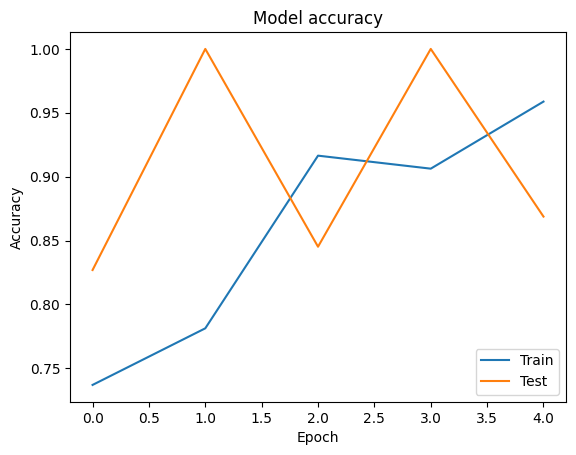

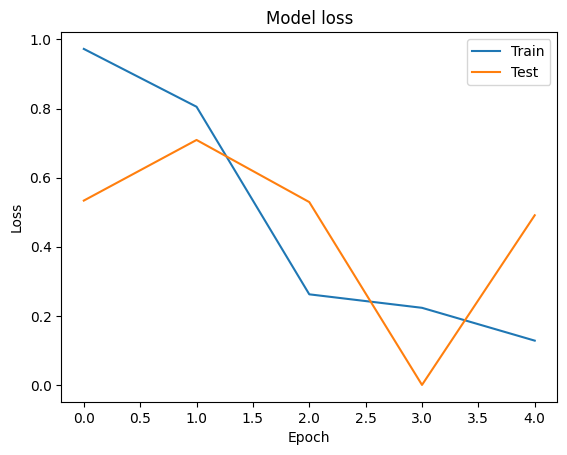

In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Building a Predictive System

In [52]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)        # Load the image
    img = img.resize(target_size)       # Resize the image
    img_array = np.array(img)           # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)      # Add batch dimension
    img_array = img_array.astype('float32') / 255.     # Scale the image values to [0, 1]
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [53]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [59]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [60]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [67]:
# Example Usage
# image_path = 'test_images/test_appl_e_black_rot.jpg'
# image_path = 'test_images/test_blueberry_healthy.jpg'
#image_path = 'test_images/test_potato_early_blight.jpg'
image_path = 'test_images/images.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class Name: Corn_(maize)___Northern_Leaf_Blight


In [68]:
model.save('plant_disease_prediction_model.h5')